In [1]:
import numpy as np
import cmath
import math
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.linalg import expm

In [2]:
def Refractive_Silver(lambdaa):
    h = 6.626*1e-34
    c = 3e8
    E = h/1.6e-19*c/lambdaa
    Energy=[0.64,
    0.77,
    0.89,
    1.02,
    1.14,
    1.26,
    1.39,
    1.51,
    1.64,
    1.76,
    1.88,
    2.01,
    2.13,
    2.26,
    2.38,
    2.50,
    2.63,
    2.75,
    2.88,
    3,
    3.12,
    3.25,
    3.37,
    3.5,
    3.62,
    3.74,
    3.87,
    3.99,
    4.12,
    4.24,
    4.36,
    4.49,
    4.61,
    4.74,
    4.86,
    4.98,
    5.11,
    5.23,
    5.36,
    5.48,
    5.6,
    5.73,
    5.85,
    5.98,
    6.1,
    6.22,
    6.35,
    6.47,
    6.6]
    
    Silver_eps=[0.24+1j*14.08,
    0.15+1j*11.85,
    0.13+1j*10.10,
    0.09+1j*8.828,
    0.04+1j*7.795,
    0.04+1j*6.992,
    0.04+1j*6.312,
    0.04+1j*5.727,
    0.03+1j*5.242,
    0.04+1j*4.838,
    0.05+1j*4.483,
    0.06+1j*4.152,
    0.05+1j*3.858,
    0.06+1j*3.586,
    0.05+1j*3.324,
    0.05+1j*3.093,
    0.05+1j*2.869,
    0.04+1j*2.657,
    0.04+1j*2.462,
    0.05+1j*2.275,
    0.05+1j*2.07,
    0.05+1j*1.864,
    0.07+1j*1.657,
    0.10+1j*1.419,
    0.14+1j*1.142,
    0.17+1j*0.829,
    0.81+1j*0.392,
    1.13+1j*0.616,
    1.34+1j*0.964,
    1.39+1j*1.161,
    1.41+1j*1.264,
    1.41+1j*1.331,
    1.38+1j*1.372,
    1.35+1j*1.387,
    1.33+1j*1.393,
    1.31+1j*1.389,
    1.30+1j*1.378,
    1.28+1j*1.367,
    1.28+1j*1.357,
    1.26+1j*1.344,
    1.25+1j*1.342,
    1.22+1j*1.336,
    1.20+1j*1.325,
    1.18+1j*1.312,
    1.15+1j*1.296,
    1.14+1j*1.277,
    1.12+1j*1.255,
    1.10+1j*1.232,
    1.07+1j*1.212]
    
    Energy = np.array([Energy])
    Silver_eps = np.array([Silver_eps])
  
    eps = np.interp(E,Energy[0],Silver_eps[0]**2)
    return eps

In [3]:
epsilon_0 = 8.85e-12
mu_0 = 1.26e-6

N = 2     #N is the number of layers inclusing the two semi infinite layers so N>1
N_d = 1   #N_d is the resolution for distance of dipole from the surface
N_z = 20  #N_z is the resolution for calculationg the fields
N_x = 20
N_lambda = 1  
N_kx = 6000  

In [4]:
n = np.ones((N, 1),dtype = complex) #ok
#n is the refractive indecies for the N layers

permit = n**2

if N-1 == 1:
    z = np.array([np.linspace(0, 0e-9, 2)])
    z = np.array([[z[0][1]]])
else:
    z = np.array([np.linspace(0, 0e-9, N-1)])
    
z_obs = np.array([np.linspace(-300e-9, 300e-9, N_z)])
# this matrix shows the z component of the points in which the fields are being calculated

x = np.array([np.linspace(0,600e-9,N_x)])

In [5]:
x

array([[0.00000000e+00, 3.15789474e-08, 6.31578947e-08, 9.47368421e-08,
        1.26315789e-07, 1.57894737e-07, 1.89473684e-07, 2.21052632e-07,
        2.52631579e-07, 2.84210526e-07, 3.15789474e-07, 3.47368421e-07,
        3.78947368e-07, 4.10526316e-07, 4.42105263e-07, 4.73684211e-07,
        5.05263158e-07, 5.36842105e-07, 5.68421053e-07, 6.00000000e-07]])

In [6]:
z_layer = np.ones((1,20), dtype = int)

for i_layer in range(0,z_obs.shape[1]):
    if z_obs[0][i_layer] > 0:
        z_layer[0][i_layer] = z_layer[0][i_layer] + 1

In [7]:
z_layer

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [8]:
#d is the distance of the dipole from the surface.
if N_d == 1 :
    d = np.array([np.linspace(0,300*1e-9, 2)])
    d = np.array([[d[0][1]]])   
else:
    d = np.array([np.linspace(0,300*1e-9, N_d)]) 

In [9]:
d

array([[3.e-07]])

In [10]:
c_0 = 3e8;

if N_lambda == 1 :
    lambda_0 = np.array([np.linspace(200e-9, 500e-9, 2)])
    lambda_0 = np.array([[lambda_0[0][1]]])   
else:
    lambda_0 = np.array([np.linspace(200e-9, 500e-9, N_lambda)]) 

w = 2*np.pi*c_0/lambda_0
k_0 = w/c_0;

if N_kx == 1 :
    k_x = np.array([np.linspace(0, (k_0[0]*15*n[0])[0], 2)])
    k_x =  np.array([[k_x[0][1]]])
else:
    k_x = np.array([np.linspace(0, (k_0[0]*15*n[0])[0], N_kx)])
    
# k_x is the wavenumber in x direction and theta is the angle of incidence    

In [11]:
k_x

array([[0.00000000e+00+0.j, 3.14211634e+04+0.j, 6.28423268e+04+0.j, ...,
        1.88432717e+08+0.j, 1.88464138e+08+0.j, 1.88495559e+08+0.j]])

In [12]:
r_p = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex )
t_p = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex )
R_p = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex )
T_p = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex )
# t and r are Transmission and reflection for H and T and R are transmission and reflection for power.

In [13]:
r_s = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex )
t_s = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex )
R_s = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex )
T_s = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex )

In [14]:
H_y = np.zeros((N_z,N_x),dtype = complex)
E_z = np.zeros((N_z,N_x),dtype = complex)
E_x = np.zeros((N_z,N_x),dtype = complex)
S_x = np.zeros((1,N_z),dtype = complex)
S_y = np.zeros((1,N_z),dtype = complex)
S_z = np.zeros((1,N_z),dtype = complex)
Le_x = np.zeros((1,N_z),dtype = complex)
Le_y = np.zeros((1,N_z),dtype = complex)
Le_z = np.zeros((1,N_z),dtype = complex)
Lm_x = np.zeros((1,N_z),dtype = complex)
Lm_y = np.zeros((1,N_z),dtype = complex)
Lm_z = np.zeros((1,N_z),dtype = complex)
U = np.zeros((1,N_z),dtype = complex)

In [15]:
n

array([[1.+0.j],
       [1.+0.j]])

In [16]:
F_gf_matrix = np.zeros((N_lambda, N_kx, 3), dtype = complex)
F_rp_matrix = np.zeros((N_lambda, N_kx, 3), dtype = complex)
F_esd_matrix = np.zeros((N_lambda, N_kx, 3), dtype = complex)
F_matrix = np.zeros((N_lambda, N_kx, 3), dtype = complex)

In [17]:
ro = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex )
# ro is W-LDOS defined in "Quantum nanophotonics using HMM" apendix C.
x_plot,z_plot = np.meshgrid(x/lambda_0, z_obs/lambda_0)

kx_plot,lambda_plot = np.meshgrid(k_x, lambda_0)
# k_x_normalized and lambda_normalized are used for plotting

In [18]:
n[1]

array([1.+0.j])

In [64]:
#eps_silver = [0]
for i_d in range(0,N_lambda):
    for i_lambda in range(0,N_lambda):
        n[0] = 1;
        n[1] = Refractive_Silver(lambda_0[0][i_lambda])**0.5
        eps_silver = Refractive_Silver(lambda_0[0][i_lambda])
        k_x = np.linspace(k_0[i_lambda]*0,k_0[i_lambda]*6*n[0],N_kx)
        kxplot = k_x
        kx_normal_plot = k_x/k_0[i_lambda]
        permit = n**2
        
        for i_kx in range(0,N_kx):
            k_z = ((np.ones((N,1))*k_0[i_lambda]*n)**2 - k_x[i_kx]**2)**0.5
            M_p = np.identity(2,dtype = complex)
            for i_layer in range(0,N-1):
                 M_p = np.dot(M_p,np.dot(np.linalg.inv((np.array([[cmath.exp(1j*k_z[i_layer]*z[i_layer]),0],[0,cmath.exp(-1j*k_z[i_layer]*z[i_layer])]])))\
                ,np.dot(np.linalg.inv((np.array([[1, 1],[(k_z[i_layer]/permit[i_layer])[0], (-k_z[i_layer]/permit[i_layer])[0]]])))\
                ,np.dot((np.array([[1, 1],[(k_z[i_layer+1]/permit[i_layer+1])[0], (-k_z[i_layer+1]/permit[i_layer+1])[0]]]))\
                ,(np.array([[cmath.exp(1j*(k_z[i_layer+1]*z[i_layer])[0]), 0],[0, cmath.exp(-1j*(k_z[i_layer+1]*z[i_layer])[0])]]))))))
                
            M_s = np.identity(2,dtype = complex)
            for i_layer in range(0,N-1):
                 M_s = np.dot(M_s,np.dot(np.linalg.inv((np.array([[cmath.exp(1j*k_z[i_layer]*z[i_layer]),0],[0,cmath.exp(-1j*k_z[i_layer]*z[i_layer])]])))\
                ,np.dot(np.linalg.inv((np.array([[1, 1],[(k_z[i_layer])[0], (-k_z[i_layer])[0]]])))\
                ,np.dot((np.array([[1, 1],[(k_z[i_layer+1])[0], (-k_z[i_layer+1])[0]]]))\
                ,(np.array([[cmath.exp(1j*(k_z[i_layer+1]*z[i_layer])[0]), 0],[0, cmath.exp(-1j*(k_z[i_layer+1]*z[i_layer])[0])]]))))))
                
            t_p[i_lambda, i_kx]=   1/M_p[0, 0]*cmath.exp(1j*k_z[i_layer+1]*z[i_layer]);
            r_p[i_lambda, i_kx]=   M_p[1, 0]/M_p[0, 0];
            T_p[i_lambda, i_kx]=   abs(t_p[i_lambda, i_kx])**2/abs(n[N-1]);
            R_p[i_lambda, i_kx]=   abs(r_p[i_lambda, i_kx])**2;    
            
            t_s[i_lambda, i_kx]=   1/M_s[0, 0]*cmath.exp(1j*k_z[i_layer+1]*z[i_layer]);
            r_s[i_lambda, i_kx]=   M_s[1, 0]/M_p[0, 0];
            T_s[i_lambda, i_kx]=   abs(t_s[i_lambda, i_kx])**2/abs(n[N-1]);
            R_s[i_lambda, i_kx]=   abs(r_s[i_lambda, i_kx])**2; 
            
            
        k_x = k_x.reshape(k_x.shape[1],k_x.shape[0])    
        max_val = np.amax(T_p[0])
        ind = np.where(T_p == max_val)
        beta = k_x[0][ind[1]]
        
        k_z = ((np.ones((N, 1),dtype = complex)*k_0[i_lambda]*n)**2 - beta**2)**0.5;
        
        M_p = np.identity(2,dtype = complex)
        
        for i_layer in range(0,N-1):
            M_p = np.dot(M_p,np.dot(np.linalg.inv((np.array([[cmath.exp(1j*k_z[i_layer]*z[i_layer]),0],[0,cmath.exp(-1j*k_z[i_layer]*z[i_layer])]])))\
            ,np.dot(np.linalg.inv((np.array([[1, 1],[(k_z[i_layer]/permit[i_layer])[0], (-k_z[i_layer]/permit[i_layer])[0]]])))\
            ,np.dot((np.array([[1, 1],[(k_z[i_layer+1]/permit[i_layer+1])[0], (-k_z[i_layer+1]/permit[i_layer+1])[0]]]))\
            ,(np.array([[cmath.exp(1j*(k_z[i_layer+1]*z[i_layer])[0]), 0],[0, cmath.exp(-1j*(k_z[i_layer+1]*z[i_layer])[0])]]))))))
                        
        
        amp = np.zeros((2,N),dtype = complex)
        amp[:,0]= [1,r_p[i_lambda,ind[1]]]
        
        for i_layer in range(1,N):
            amp[:,i_layer] = np.dot(np.dot(np.linalg.inv((np.array([[cmath.exp(1j*k_z[i_layer]*z[i_layer-1]),0],[0,cmath.exp(-1j*k_z[i_layer]*z[i_layer-1])]])))\
            ,np.dot(np.linalg.inv((np.array([[1, 1],[(k_z[i_layer]/permit[i_layer])[0], (-k_z[i_layer]/permit[i_layer])[0]]])))\
            ,np.dot((np.array([[1, 1],[(k_z[i_layer-1]/permit[i_layer-1])[0], (-k_z[i_layer-1]/permit[i_layer-1])[0]]]))\
            ,(np.array([[cmath.exp(1j*(k_z[i_layer-1]*z[i_layer-1])[0]), 0],[0, cmath.exp(-1j*(k_z[i_layer-1]*z[i_layer-1])[0])]]))))), amp[:,i_layer - 1])
            
        amp[1][-1] = 0
        
        k_x = k_x.reshape(k_x.shape[1],k_x.shape[0])
        
        for i_point in range(0,N_z):
            temp = np.array([[cmath.exp(1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point]), cmath.exp(-1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point])]])
            temp2 = np.array([amp[:,(z_layer[0][i_point] - 1)]]).reshape(2,1)
            temp3 = np.array([np.exp(1j*beta*x[0])])           
            H_y[i_point,:] = np.dot(np.dot(temp,temp2),temp3)
                
            temp4 = np.array([[cmath.exp(1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point]), -cmath.exp(-1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point])]])
            temp5 = np.array([amp[:,(z_layer[0][i_point] - 1)]]).reshape(2,1)
            temp6 = np.array(k_z[(z_layer[0][i_point] - 1)]/permit[(z_layer[0][i_point] - 1)]/(epsilon_0**0.5)*(mu_0**0.5)/k_0[0][i_lambda]*[np.exp(1j*beta*x[0])])
            E_x[i_point,:] = np.dot(np.dot(temp4,temp5),temp6)
                
            temp7 = np.array([[-cmath.exp(1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point]), -cmath.exp(-1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point])]])
            temp8 = np.array([amp[:,(z_layer[0][i_point] - 1)]]).reshape(2,1)
            temp9 = np.array(beta/permit[(z_layer[0][i_point] - 1)]/(epsilon_0**0.5)*(mu_0**0.5)/k_0[0][i_lambda]*[np.exp(1j*beta*x[0])])
            E_z[i_point,:] = np.dot(np.dot(temp7,temp8),temp9)        

<Figure size 14400x14400 with 0 Axes>

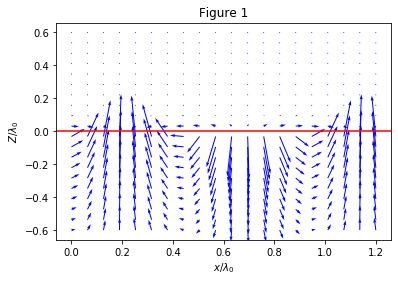

In [94]:
plt.figure(figsize = (200,200))
fig, ax = plt.subplots()
q = ax.quiver(x_plot,z_plot,E_x.real,E_z.real,color = "Blue", scale = None , scale_units = 'inches')
plt.axhline(color='r', linestyle='-')
plt.title('Figure 1')
plt.xlabel(r"$ x/\lambda_0 $")
plt.ylabel(r"$ Z/\lambda_0  $")
plt.savefig('SPP.pdf')
plt.show()